# Predicting Breast Cancer using Decision Trees: A test of Gini versus entropy in predictive performance

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split 

from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_auc_score

import os

from IPython.display import Image

import seaborn as sns
import matplotlib.pyplot as plt


Summary: Below I ran decision trees on the Breast Cancer dataset to predict whether a tumor was malignant or benign based on the other columns. In summary, the Gini Decision tree performed best according to a variety of metrics (see below). The Entropy and Gini trees split the data on similar attributes, but with different thresholds for the split. After visualizing hte tree, it appears the most important attributes are the "uniform size" and the "bare_nuclei". The model largely ignores the other attributes in its best performing model.

Generally, the model does well at predicting positive (cancerous) cases, but there are several false positives from the model. This means that a substantial number of patients would be told they have cancer when in fact they do not. Other, non-deicion-tree models would ideal

Data is from the Breast Cancer Wisconsin (Diagnostic) Data Set 

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 

# Import data and handle missing, format columns appropriately

In [2]:
bc=pd.read_csv(r'https://raw.githubusercontent.com/Rylan-L/data_science/master/data_sets/WI_Breast_Cancer.csv', sep = ',',
               names=['sample', 'class','clump_thick','uniform_size','uniform_shape','adhesion','single_cell_size',
                      'bare_nuclei','bland_chromatin','norm_nucleoli','mitosis'])

# Helpful tools to learn about yoru data
bc.info()       # gives the structure of the data (rows/cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 11 columns):
sample              709 non-null object
class               702 non-null object
clump_thick         702 non-null float64
uniform_size        701 non-null float64
uniform_shape       701 non-null float64
adhesion            701 non-null float64
single_cell_size    701 non-null float64
bare_nuclei         701 non-null float64
bland_chromatin     701 non-null float64
norm_nucleoli       701 non-null float64
mitosis             701 non-null object
dtypes: float64(8), object(3)
memory usage: 61.0+ KB


In [3]:
bc.describe()   # gives the statistics on the data in the DF

,clump_thick,uniform_size,uniform_shape,adhesion,single_cell_size,bare_nuclei,bland_chromatin,norm_nucleoli
count,702.000000,701.000000,701.00000,701.000000,701.000000,701.000000,701.000000,701.000000
mean,7.263533,3.154066,3.21826,2.813124,3.226819,3.456491,3.447932,2.877318
std,75.031332,3.069053,2.97456,2.858201,2.220340,3.637881,2.447550,3.061150
min,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,2.000000,1.000000,1.00000,1.000000,2.000000,1.000000,2.000000,1.000000
50%,4.000000,1.000000,1.00000,1.000000,2.000000,1.000000,3.000000,1.000000
75%,6.000000,5.000000,5.00000,4.000000,4.000000,5.000000,5.000000,4.000000
max,1991.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000


In [4]:
#the class contains missing values and a strange string
bc['class'].unique()

#delete columns without a classification
bc = bc[pd.notnull(bc['class'])]
bc=bc[bc['class']!=' 1990; Updated Jan 8']

bc["class"] = pd.to_numeric(bc["class"])
bc["mitosis"] = pd.to_numeric(bc["mitosis"],errors='coerce')

In [5]:
def replace_nan(df,columns,method='median'):
    '''Replace nan values in select pandas dataframe columns
    :Param df: dataframe to replace nans from
    :Param columns: columns to replace nans from
    :Param method: whether to use median or mean
    '''
    if method=='median':
        return df[columns].fillna(df.median())
    elif method=='mean':
        return df[columns].fillna(df.mean())
    
bc=replace_nan(bc,columns=list(bc.columns))

In [6]:
features=list(bc.columns)
features.remove('sample')
features.remove('class')

X=bc[features]
Y=bc['class']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=1)

# Vary Hyperparameters (max_leafs and max_depth)

In [7]:
#test number of max leafs between 3 and 20
max_leafs=20

for leaf in range(3,max_leafs):
    
    print ('Trying max leafs equal to ' + str(leaf) + '\n')
    # Use entropy = no limit on samples for split
    model_ent = DecisionTreeClassifier(max_leaf_nodes = leaf, criterion = 'entropy')
    model_ent.fit(X_train, y_train)
    y_ent_pred = model_ent.predict(X_test)

    # Use information gain (default) limit min_samples to 4
    model_gini = DecisionTreeClassifier(max_leaf_nodes = leaf)
    model_gini.fit(X_train, y_train)
    y_gini_pred = model_gini.predict(X_test)

    # NOTE: You should, when testing models, only vary 1 thing at a time. 
    
    print("Entropy accuracy is : {}%".format(accuracy_score(y_test, y_ent_pred)*100))
    print("Gini accuracy is : {}%".format(accuracy_score(y_test, y_gini_pred)*100))
    
    y_train_ent_pred = model_ent.predict(X_train)

    y_train_gini_pred = model_gini.predict(X_train)
    
    res = pd.DataFrame(columns = ["criteria", "data", "metric"])
    res.loc[0, :] = ["entropy", "train", f1_score(y_train, y_train_ent_pred,pos_label=4)]
    res.loc[1, :] = ["gini", "train", f1_score(y_train, y_train_gini_pred,pos_label=4)]
    res.loc[2, :] = ["entropy", "test", f1_score(y_test, y_ent_pred,pos_label=4)]
    res.loc[3, :] = ["gini", "test", f1_score(y_test, y_gini_pred,pos_label=4)]
    
    print(res)
    
    print ('\n')

Trying max leafs equal to 3

Entropy accuracy is : 91.54929577464789%
Gini accuracy is : 92.95774647887323%
  criteria   data    metric
0  entropy  train  0.895787
1     gini  train  0.918794
2  entropy   test   0.90625
3     gini   test  0.918033


Trying max leafs equal to 4

Entropy accuracy is : 91.54929577464789%
Gini accuracy is : 94.36619718309859%
  criteria   data    metric
0  entropy  train  0.895787
1     gini  train  0.931507
2  entropy   test   0.90625
3     gini   test  0.935484


Trying max leafs equal to 5

Entropy accuracy is : 90.14084507042254%
Gini accuracy is : 94.36619718309859%
  criteria   data    metric
0  entropy  train  0.935252
1     gini  train  0.931507
2  entropy   test  0.877193
3     gini   test  0.935484


Trying max leafs equal to 6

Entropy accuracy is : 91.54929577464789%
Gini accuracy is : 91.54929577464789%
  criteria   data    metric
0  entropy  train  0.953052
1     gini  train  0.948598
2  entropy   test  0.896552
3     gini   test       0.9




The best hyperparameter for max_leafs appears to be 4 based on running the for loop above and then measuring the F1 score on teh test dataset




In [8]:
max_depth=20
for deep in range(2,max_depth):
    
    print ('Trying max depth equal to ' + str(deep) + '\n')
    # Use entropy = no limit on samples for split
    model_ent = DecisionTreeClassifier(max_leaf_nodes = 4, max_depth=deep,criterion = 'entropy')
    model_ent.fit(X_train, y_train)
    y_ent_pred = model_ent.predict(X_test)

    # Use information gain (default) limit min_samples to 4
    model_gini = DecisionTreeClassifier(max_leaf_nodes = 4,max_depth=deep)
    model_gini.fit(X_train, y_train)
    y_gini_pred = model_gini.predict(X_test)

    # NOTE: You should, when testing models, only vary 1 thing at a time. 
    
    print("Entropy accuracy is : {}%".format(accuracy_score(y_test, y_ent_pred)*100))
    print("Gini accuracy is : {}%".format(accuracy_score(y_test, y_gini_pred)*100))
    
    y_train_ent_pred = model_ent.predict(X_train)

    y_train_gini_pred = model_gini.predict(X_train)
    
    res = pd.DataFrame(columns = ["criteria", "data", "metric"])
    res.loc[0, :] = ["entropy", "train", f1_score(y_train, y_train_ent_pred,pos_label=4)]
    res.loc[1, :] = ["gini", "train", f1_score(y_train, y_train_gini_pred,pos_label=4)]
    res.loc[2, :] = ["entropy", "test", f1_score(y_test, y_ent_pred,pos_label=4)]
    res.loc[3, :] = ["gini", "test", f1_score(y_test, y_gini_pred,pos_label=4)]

    print(res)
    
    print ('\n')

Trying max depth equal to 2

Entropy accuracy is : 91.54929577464789%
Gini accuracy is : 94.36619718309859%
  criteria   data    metric
0  entropy  train  0.895787
1     gini  train  0.931507
2  entropy   test   0.90625
3     gini   test  0.935484


Trying max depth equal to 3

Entropy accuracy is : 91.54929577464789%
Gini accuracy is : 94.36619718309859%
  criteria   data    metric
0  entropy  train  0.895787
1     gini  train  0.931507
2  entropy   test   0.90625
3     gini   test  0.935484


Trying max depth equal to 4

Entropy accuracy is : 91.54929577464789%
Gini accuracy is : 94.36619718309859%
  criteria   data    metric
0  entropy  train  0.895787
1     gini  train  0.931507
2  entropy   test   0.90625
3     gini   test  0.935484


Trying max depth equal to 5

Entropy accuracy is : 91.54929577464789%
Gini accuracy is : 94.36619718309859%
  criteria   data    metric
0  entropy  train  0.895787
1     gini  train  0.931507
2  entropy   test   0.90625
3     gini   test  0.935484




Changing the max depth when the max number of leaves is set does not have almost any effect on the model performance, suggesting its not a determining factor of hte model

(0, 1)

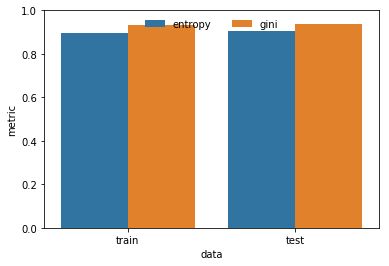

In [9]:
bp = sns.barplot(x =  "data", hue = "criteria", y = "metric", data = res)
bp.legend(frameon = False, loc = "upper center", ncol = 2)
bp.set_ylim(0, 1)

In [10]:
print('Gini')
print(classification_report(y_test, y_gini_pred))

Gini
             precision    recall  f1-score   support

          2       0.93      0.97      0.95        39
          4       0.97      0.91      0.94        32

avg / total       0.94      0.94      0.94        71



In [11]:
print('Entropy')
print(classification_report(y_test, y_ent_pred))

Entropy
             precision    recall  f1-score   support

          2       0.92      0.92      0.92        39
          4       0.91      0.91      0.91        32

avg / total       0.92      0.92      0.92        71



In [12]:
pd.DataFrame(
    confusion_matrix(y_test, y_gini_pred),
    columns=['Predicted Cancer', 'Predicted non-cancer'],
    index=['Predicted Cancer', 'Predicted non-cancer']
)

,Predicted Cancer,Predicted non-cancer
Predicted Cancer,38,1
Predicted non-cancer,3,29


# Visualization of Trees (Gini and Entropy)

In [24]:
# show the png
Image(filename='dtree.png', width=1000, height=1000) 

FileNotFoundError: [Errno 2] No such file or directory: 'dtree.png'

In [ ]:
#create a visualization of the tree -- must install graphviz and pydot2 packages for this to work
dotfile_2 = open("dtree_entropy.dot", 'w')
tree.export_graphviz(model_ent, out_file = dotfile_2, feature_names = features)
dotfile_2.close()

#Convert the dot file to a png

os.system("dot -Tpng dtree_entropy.dot -o dtree_entropy.png")


In [ ]:
# show the png
Image(filename='dtree_entropy.png', width=1000, height=1000) 

The entropy and Gini trees are split on similar attributes, however the threshold for the splits is different between the two (eg. bare_nuclei <=4.5 for entropy, but <=5.5 for Gini). These threshold likely explain the difference in the model's performance between these two options

# AUC Analysis

In [ ]:
predictions = model_gini.predict_proba(X_test)

print ('AUC score for Gini: ' + str(roc_auc_score(y_test, predictions[:,1])))

fpr, tpr, _ = roc_curve(y_test, predictions[:,1],pos_label=4)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('GINI ROC curve')
plt.show()

In [ ]:
predictions = model_ent.predict_proba(X_test)

print ('AUC score for Entropy: ' + str(roc_auc_score(y_test, predictions[:,1])))

fpr, tpr, _ = roc_curve(y_test, predictions[:,1],pos_label=4)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Entropy ROC curve')
plt.show()